practice_03.ipynb

# Hang in there, my friend — this is the turning point.

Today, we are coding this from scratch :

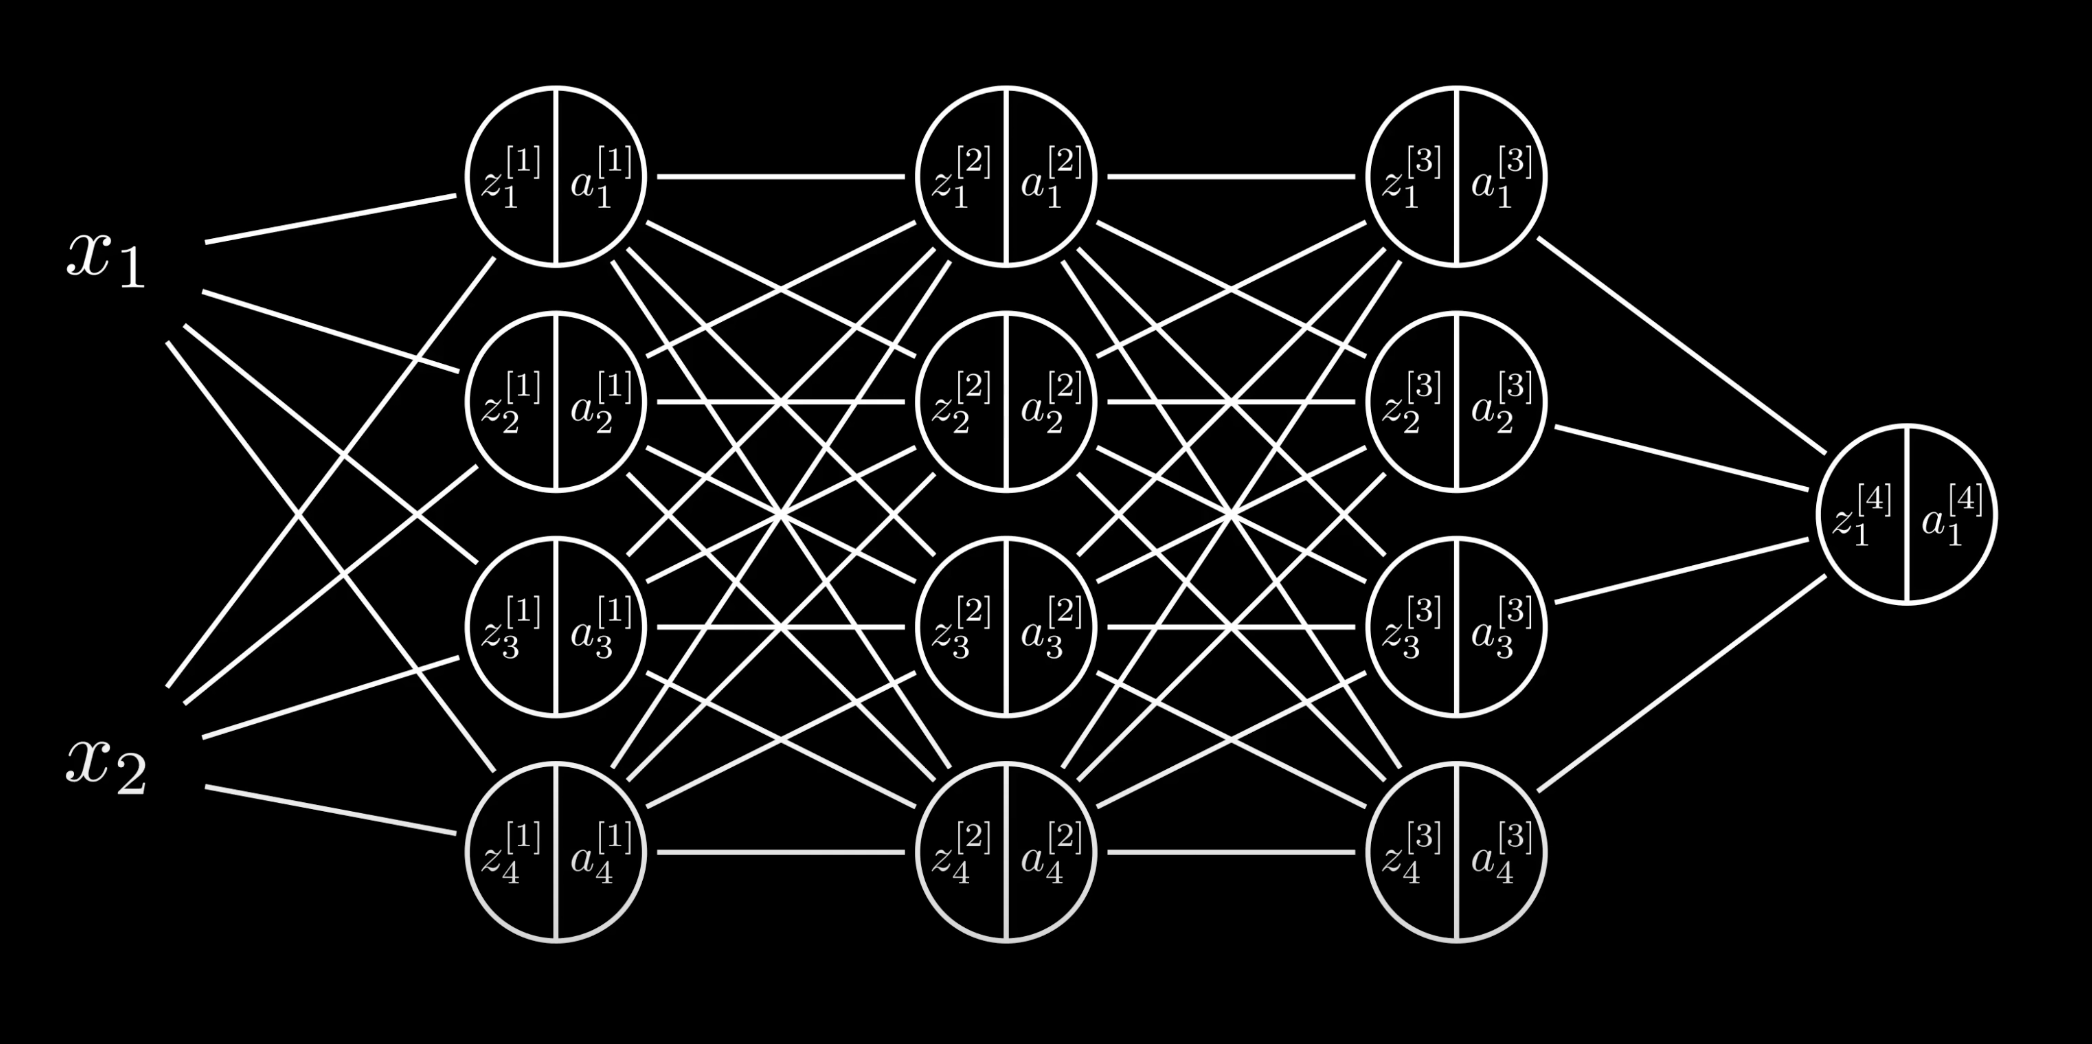

In [1]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/photos_git/graph_7.png", width=600, height=300))

More precisely, we are coding to code this :

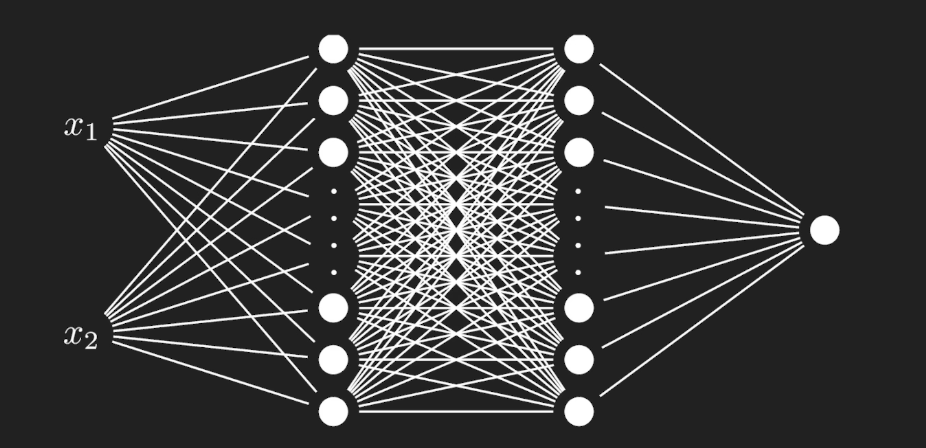

In [2]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/photos_git/graph_8.png", width=600, height=300))

With as many layers and neurons as we want.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## Initialization

In [4]:
def initialisation(dimensions):
    # Create a dictionary to store the weights (W) and biases (b)
    parameters = {}

    # Total number of layers (input + hidden + output)
    L = len(dimensions)

    # Loop through each layer starting from 1 (layer 0 is the input layer)
    for l in range(1, L):
        # Initialize weights with random values: 
        # shape (neurons in current layer, neurons in previous layer)
        parameters[f'W{l}'] = np.random.randn(dimensions[l], dimensions[l-1])

        # Initialize biases with random values: 
        # shape (neurons in current layer, 1)
        parameters[f'b{l}'] = np.random.randn(dimensions[l], 1)

    # Return the dictionary containing all parameters
    return parameters


In [5]:
# Defines the network architecture
dimensions = [2, 32, 32, 1] 

# Initializes weights and biases
parameters = initialisation(dimensions)  

# Prints the shape of each weight and bias matrix
for key, value in parameters.items():
    print(key, value.shape)

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


Here you are, you just build the same neural network as shown in the picture above.

Now we have to give this neural network a purpose, a consciousness, a goal.

## Forward propagation

Remember the forward propagation we did in the previous notebook ?

There were one thing very important to remember.

The first layer (input layer) takes as input the data. But the second layer (hidden layer) takes as input the output of the first layer.

We are going to generalize that. In fact, we are going to say that the i-th hidden layer takes as input the output of the (i-1)-th hidden layer, from the first layer (input layer) to the last layer (output layer).

In [32]:
from sklearn.datasets import make_blobs, make_circles, make_moons

X shape: (2, 100)
y shape: (1, 100)


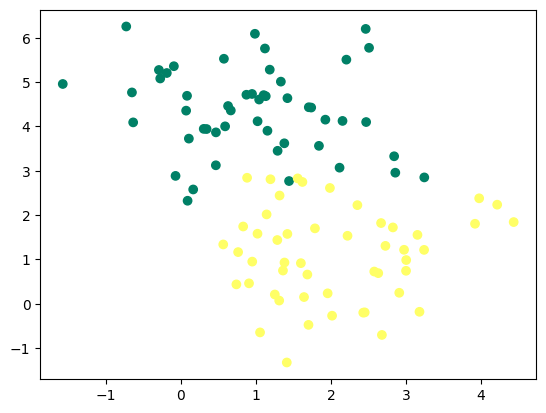

In [7]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

# Create a scatter plot of the data
print('X shape:', X.shape)
print('y shape:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [8]:
def forward_propagation(X, parameters):
    activations = {}

    # Total number of layers (each has a W and b, so divide by 2)
    L = len(parameters) // 2

    # Store the input layer activation (A0)
    A = X
    activations['A0'] = A

    # Loop through all layers to compute activations
    for l in range(1, L + 1):
        # Get weights and biases for the current layer
        W = parameters[f'W{l}']
        b = parameters[f'b{l}']

        # Layer computation
        Z = np.dot(W, A) + b

        # Activation using sigmoid function
        A = 1 / (1 + np.exp(-Z))

        # Save the current layer's activation in the dictionary
        activations[f'A{l}'] = A

    # Return all computed activations
    return activations

The `forward_propagation` function generalizes activation computation in a multi-layer neural network. Each layer takes the activation from the previous layer $A^{[i-1]}$, applies a linear transformation $Z^{[i]} = W^{[i]} A^{[i-1]} + b^{[i]}$, and passes it through a sigmoid activation to obtain $A^{[i]}$. This process repeats for all layers, linking them in a chain-like structure. It enables information to flow from the input to the output, while each layer progressively extracts higher-level features from the data. This modular, differentiable architecture is essential for learning complex functions through gradient-based optimization.


In [9]:
activations = forward_propagation(X, parameters)
for key, value in activations.items():
    print(key, value.shape)

A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)


## General Backpropagation Equations for Any Layer `l`

### Forward Prop
For a layer `l`, the forward pass computes:
- $Z_l = W_l \cdot A_{l-1} + b_l$
- $A_l = \sigma(Z_l)$, where $\sigma$ is the sigmoid activation function

---

### Backpropagation

Remember, in the backpropagation process, we work from the output layer to the input layer.
Now take the time to understand the following question.

**How do we generalize the backpropagation equations for any layer `l`?**

We found those equations in the previous notebook for a two-layer neural network :
$$
\left[
\begin{aligned}
\mathbf{\frac{\partial \mathcal{L}}{\partial W_2}} &= \mathbf{\frac{1}{m} (A_2 - y) \cdot A_1} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial b_2}} &= \mathbf{\frac{1}{m} \sum_m{(A_2 - y)}} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial W_1}} &= \mathbf{\frac{1}{m} dZ_1 \cdot X} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial b_1}} &= \mathbf{\frac{1}{m} \sum_m{dZ_1}}
\end{aligned}
\right]
$$
With the terms:
$$
\left[
\begin{aligned}
\mathbf{dZ_2} &= \mathbf{A_2 - y} \\
\mathbf{dZ_1} &= \mathbf{dZ_2 \cdot W_2 \cdot A_1 \cdot (1 - A_1)}
\end{aligned}
\right]
$$

Taking a closer look at the equations, we can see that the gradient computation for every hidden layer uses the activation of the previous layer. That we can generalize to any layer `l` as follows:

For every layer `l`, we have:
$$
\left[
\begin{aligned}
\mathbf{\frac{\partial \mathcal{L}}{\partial W_l}} &= \mathbf{\frac{1}{m} dZ_l \cdot A_{l-1}} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial b_l}} &= \mathbf{\frac{1}{m} \sum_m{dZ_l}}
\end{aligned}
\right]
$$
with the terms:
$$
\left[
\begin{aligned}
\mathbf{dZ_{L}} &= \mathbf{A_L - Y} \\
\mathbf{dZ_l} &= \mathbf{dZ_{l+1} \cdot W_{l+1} \cdot A_l \cdot (1 - A_l)}
\end{aligned}
\right]
$$


#### How do we process

In the backpropagation process, we work from the output layer to the input layer. So let's compute the gradients for the last layer `L` and then for all the hidden layers `l < L`.

#### In any case, the gradients are computed the same way, for any layer `l =< L`:
- $\frac{\partial \mathcal{L}}{\partial W_l} = \frac{1}{m} \cdot dZ_l \cdot A_{l-1}^T$
- $\frac{\partial \mathcal{L}}{\partial b_l} = \frac{1}{m} \cdot \sum_{i=1}^m dZ_l^{(i)}$

#### 1. BUT for the Output Layer `L` :
- $dZ_L = A_L - Y$

#### 2. For all the other layers `l < L`:

- $dZ_l = (W_{l+1}^T \cdot dZ_{l+1}) \circ (A_l \circ (1 - A_l))$



Where:
- $m$ is the number of examples
- $A_{l-1}$ is the activation from the previous layer
- $dZ_l$ is the error term at layer `l`

---

### Summary

Backpropagation works by:
1. Computing the output error $dZ_L$
2. Propagating it backward through the network using weights and sigmoid derivative
3. Computing gradients $\frac{\partial \mathcal{L}}{\partial W_l}$ and $\frac{\partial \mathcal{L}}{\partial b_l}$ for all layers
4. Using these gradients to update weights and biases via gradient descent



Take all the equations above to compare with the code below, and understand how we can code the generalize the backpropagation process for any layer `l` in a neural network.

In [10]:
def back_propagation(y, parameters, activations):
    # Number of examples
    m = y.shape[1]

    # Number of layers
    L = len(parameters) // 2

    # Initialize dZ for the output layer: dZ = A_L - y
    # Be careful with the shapes
    #print('y shape:', y.shape)
    #print('A_L shape:', activations[f'A{L}'].shape)

    dZ = activations[f'A{L}'] - y

    # Dictionary to store gradients
    gradients = {}

    # Loop backward through the layers
    for l in reversed(range(1, L + 1)):
        # Compute gradients for weights and biases
        gradients[f'dW{l}'] = 1/m * np.dot(dZ, activations[f'A{l-1}'].T)
        gradients[f'db{l}'] = 1/m * np.sum(dZ, axis=1, keepdims=True)

        # If not the first layer, compute dZ for the previous layer
        if l > 1:
            dA_prev = np.dot(parameters[f'W{l}'].T, dZ)
            A_prev = activations[f'A{l-1}']
            dZ = dA_prev * A_prev * (1 - A_prev)  # derivative of sigmoid

    return gradients

In [11]:
# Compute gradients using backpropagation
gradients = back_propagation(y, parameters, activations)
for key, value in gradients.items():
    print(key, value.shape)

dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


Now that we have the gradients, we can update the parameters of the neural network :

In [12]:
def update(gradients, parameters, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L):
        parameters[f'W{l}']=parameters[f'W{l}'] - learning_rate * gradients[f'dW{l}']
        parameters[f'b{l}']=parameters[f'b{l}'] - learning_rate * gradients[f'db{l}']

    return parameters

In [13]:
parameters = update(gradients, parameters, learning_rate=0.1)

Now that we've updated the parameters, let's quickly code the prediction function, to check if our neural network is able to predict the right label for a given input. It is the same as always guys. (remember why ?)

In [ ]:
def predict(X, parameters):
    L = len(parameters) // 2
    activations = forward_propagation(X, parameters)
    A = activations[f'A{L}']
    #)
    return A >= 0.5

In [15]:
A = predict(X, parameters)

OK we have everything to build the `neural network` function.

## Final Neural Network Code

In [ ]:
from sklearn.metrics import log_loss, accuracy_score
from tqdm import tqdm

In [57]:
def neural_network(X, y, dimensions, learning_rate, epoch):

    parameters = initialisation(dimensions)

    train_loss = []
    train_acc = []

    for i in tqdm(range(epoch)):
        L = len(parameters) // 2
        activations = forward_propagation(X, parameters)
        # compare the output data: the last activation, to the ground truth y
        train_loss.append(log_loss(y.flatten(), activations[f'A{L}'].flatten()))
        # make the predictions with these parameters
        predictions = predict(X, parameters)
        # compare the predictions to the ground truth y
        train_acc.append(accuracy_score(y.flatten(), predictions.flatten()))
        # compute the gradients accordingly
        gradients = back_propagation(y, parameters, activations)
        # update the parameters with these gradients
        parameters = update(gradients, parameters, learning_rate)

    # Ploting the curves (loss and accuracy)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return parameters

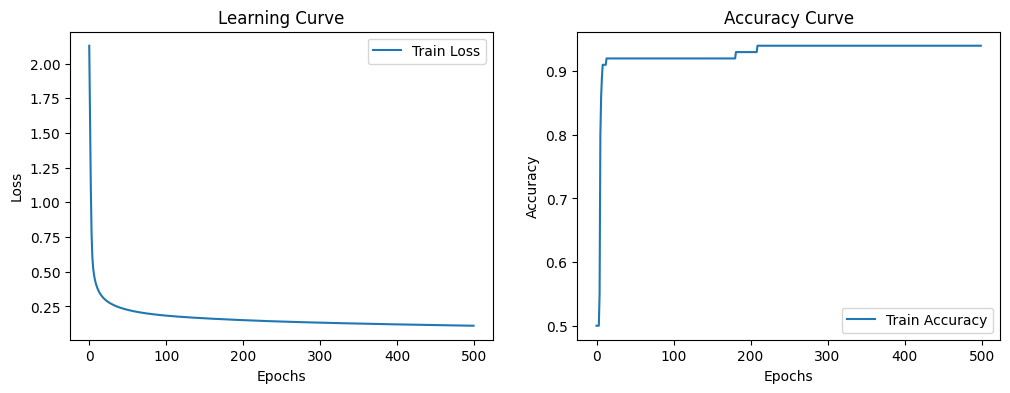

In [18]:
parameters = neural_network(X, y, [2, 64, 64, 1] , learning_rate=0.1, epoch=500)

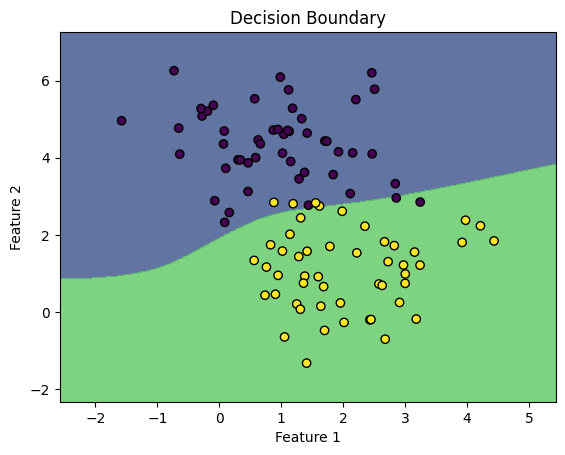

In [ ]:
def decision_boundary(X, y, parameters):
    if X.shape[0] == 2:
        X_plot = X.T
    else:
        X_plot = X

    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]       # shape (n_points, 2)
    Z = predict(grid.T, parameters)            # shape (1, n_points)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y.flatten(), edgecolors='k', marker='o')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


decision_boundary(X, y, parameters)

Now you understand to power of the neural network.

dimensions de X: (2, 100)
dimensions de y: (1, 100)


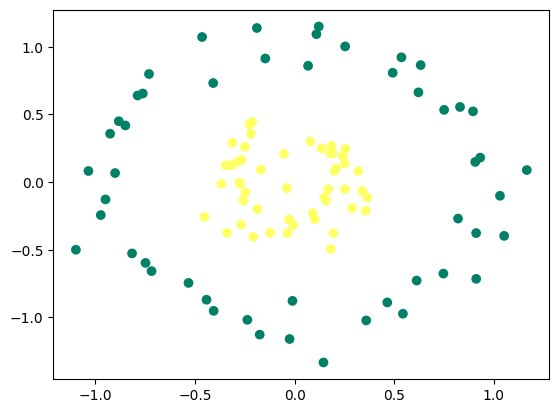

In [20]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

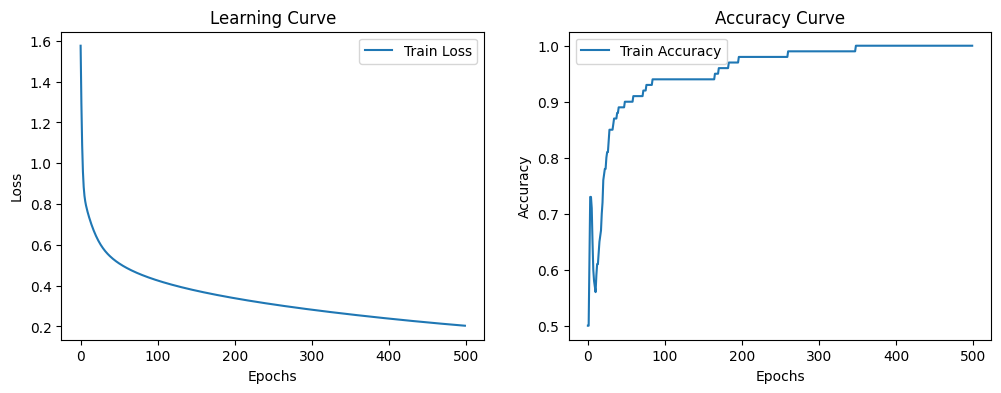

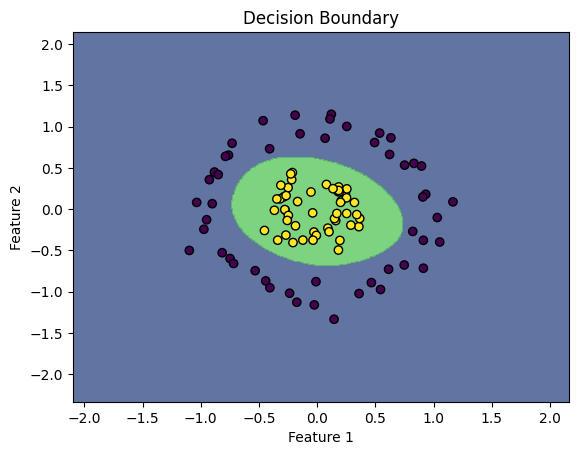

In [21]:
parameters = neural_network(X, y, [2, 64, 64, 1] , learning_rate=0.1, epoch=500)
decision_boundary(X, y, parameters)

Now you understand the power of the neural network.

I don't know if you undersstand. EVERY data set can be classified now.

You may nothing about machine learning, but you can build a neural network that can classify any data set.

I am not joking, look :

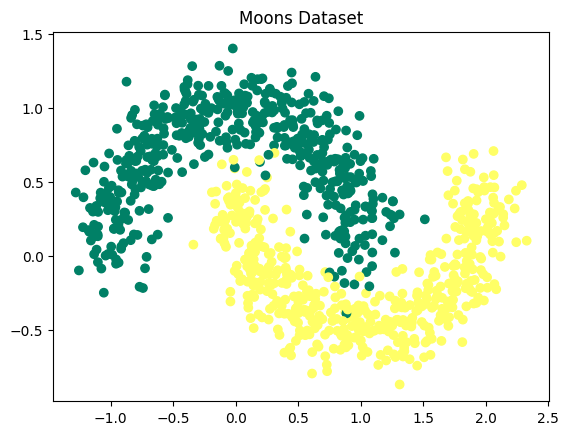

In [38]:
X, y = make_moons(n_samples=1000, noise=0.15, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.title("Moons Dataset")
plt.show()

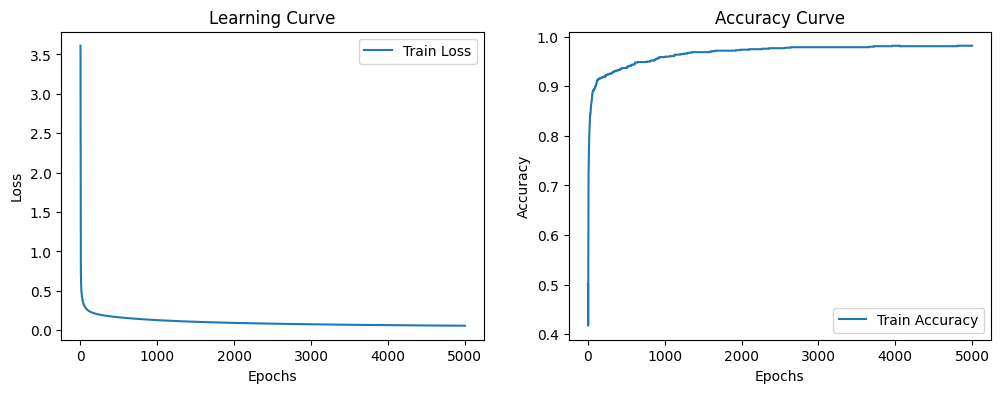

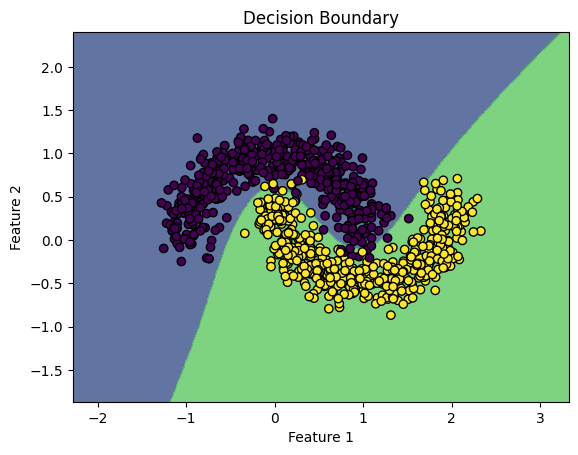

In [49]:
parameters = neural_network(X, y, [2, 64, 64, 1], learning_rate=0.1, epoch=5000)
decision_boundary(X, y, parameters)

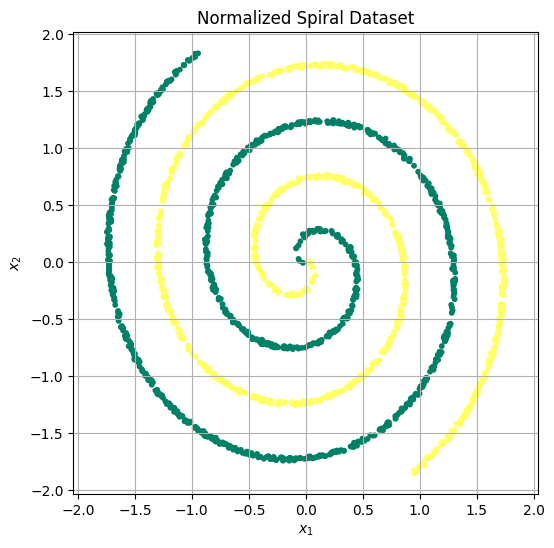

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def make_spirals(n_samples=1000, noise=0.2, normalize=True, plot=True):
    # Generate theta values with sqrt spacing for even density
    theta = np.sqrt(np.random.rand(n_samples, 1)) * 780 * (2 * np.pi / 360)

    # First spiral (label 0)
    x1 = -np.cos(theta) * theta + np.random.rand(n_samples, 1) * noise
    y1 =  np.sin(theta) * theta + np.random.rand(n_samples, 1) * noise
    spiral1 = np.hstack((x1, y1))

    # Second spiral (label 1)
    x2 =  np.cos(theta) * theta + np.random.rand(n_samples, 1) * noise
    y2 = -np.sin(theta) * theta + np.random.rand(n_samples, 1) * noise
    spiral2 = np.hstack((x2, y2))

    # Stack data
    X = np.vstack((spiral1, spiral2)).T       # Shape: (2, 2n)
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))  # Shape: (2n,)
    y = y.reshape(1, -1)                       # Shape: (1, 2n)

    # Normalize to [-1, 1] or 0-mean/1-std
    if normalize:
        X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

    # Plot if requested
    if plot:
        plt.figure(figsize=(6, 6))
        plt.scatter(X[0], X[1], c=y.flatten(), cmap='summer', s=10)
        plt.title("Normalized Spiral Dataset")
        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        plt.grid(True)
        plt.axis("equal")
        plt.show()

    return X, y

X, y = make_spirals(n_samples=1000, noise=0.2, normalize=True, plot=True)

100%|██████████| 5000/5000 [01:21<00:00, 61.07it/s]


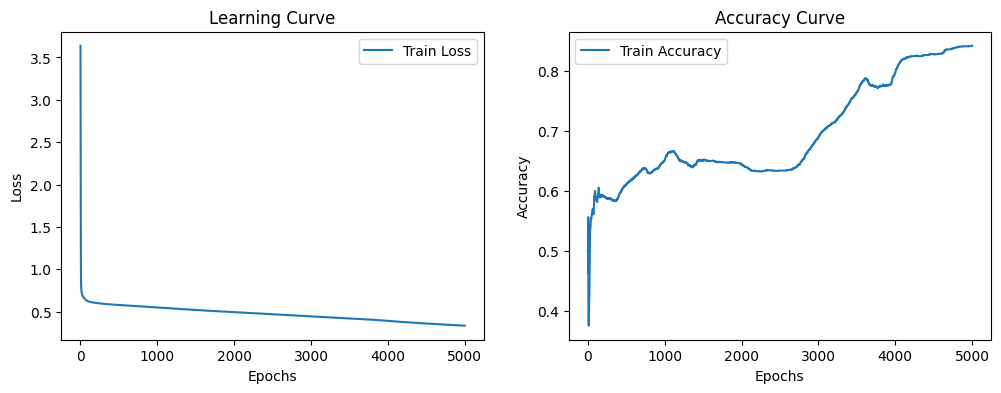

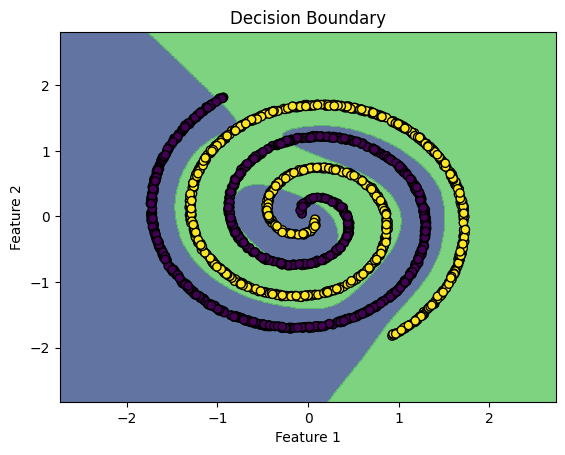

In [59]:
parameters = neural_network(X, y, [2, 64, 64, 64, 1], learning_rate=0.1, epoch=5000)
decision_boundary(X, y, parameters)

Sometimes, of course it is not perfect, but we can clearly see that the neural network is searching to classify the data set.\
Here, we have a final training accuracy of 85%, which is not bad for a first try.

Of course, the performance is determined by our objectives: a 85% accuracy is not enough for a self-driving car, but it is enough for a simple classification task.

100%|██████████| 5000/5000 [04:55<00:00, 16.94it/s]


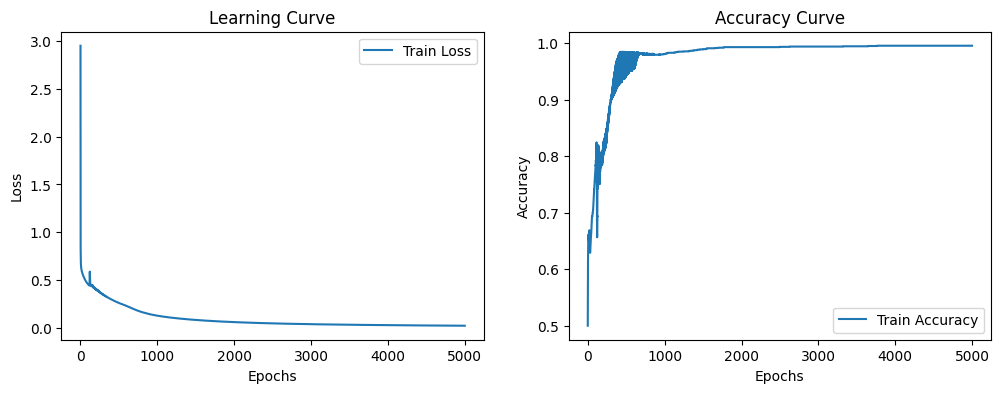

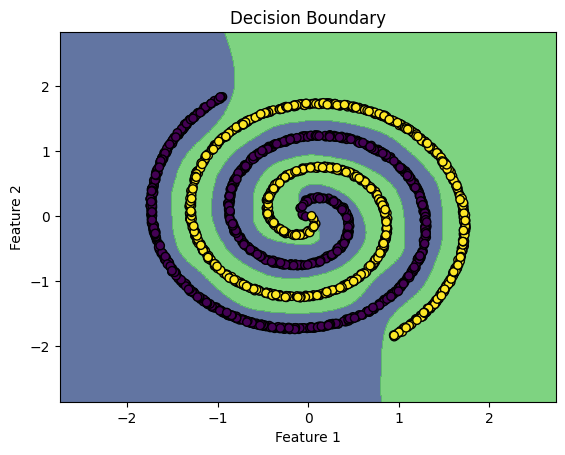

In [61]:
parameters = neural_network(X, y, [2, 128, 128, 128, 128, 1], learning_rate=0.1, epoch=5000)
decision_boundary(X, y, parameters)

That's better, the model just needed neurons and layers to learn the data set.

But be careful, the model is not perfect.\
Sometimes, adding more layers and neurons can confuse the model.\
The model can learn the data set, but it can also learn the noise of the data set.\
This is called overfitting.

Let's take an example :

What about the performance on the cat/dog dataset ?

Let's just modify the `neural_network` function to add the test process.

In [36]:
from tqdm import tqdm

In [ ]:
def neural_network2(X_train, y_train, X_test, y_test, dimensions, learning_rate, epoch):

    parameters = initialisation(dimensions)

    train_loss = []
    train_acc = []

    test_loss = []
    test_acc = []

    for i in tqdm(range(epoch)):
        L = len(parameters) // 2

        activations = forward_propagation(X_train, parameters)

        if i % 100 == 0:
            # TRAINING
            # compare the output data: the last activation, to the ground truth y
            train_loss.append(log_loss(y_train.flatten(), activations[f'A{L}'].flatten()))
            predictions = predict(X_train, parameters)
            train_acc.append(accuracy_score(y_train.flatten(), predictions.flatten()))
            

            # TESTING
            # forward propagation on the test set
            activations_test = forward_propagation(X_test, parameters)
            # same step of comparison as above
            test_loss.append(log_loss(y_test.flatten(), activations_test[f'A{L}'].flatten()))
            predict_test = predict(X_test, parameters)
            test_acc.append(accuracy_score(y_test.flatten(), predict_test.flatten()))
        
        gradients = back_propagation(y_train, parameters, activations)
        parameters = update(gradients, parameters, learning_rate)

    # Ploting the curves (loss and accuracy)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(test_loss, label='Test Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(test_acc, label='Test Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return parameters

In [ ]:
from utilities import *

X_train, y_train, X_test, y_test = load_data()

X_train_reshaped = X_train.reshape(64*64, -1) / 255.0
X_test_reshaped = X_test.reshape(64*64, -1) / 255.0


y_train = y_train.T
y_test = y_test.T

print('X_train shape:', X_train_reshaped.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test_reshaped.shape)
print('y_test shape:', y_test.shape)

X_train shape: (4096, 1000)
y_train shape: (1, 1000)
X_test shape: (4096, 200)
y_test shape: (1, 200)


100%|██████████| 5000/5000 [00:51<00:00, 97.95it/s] 


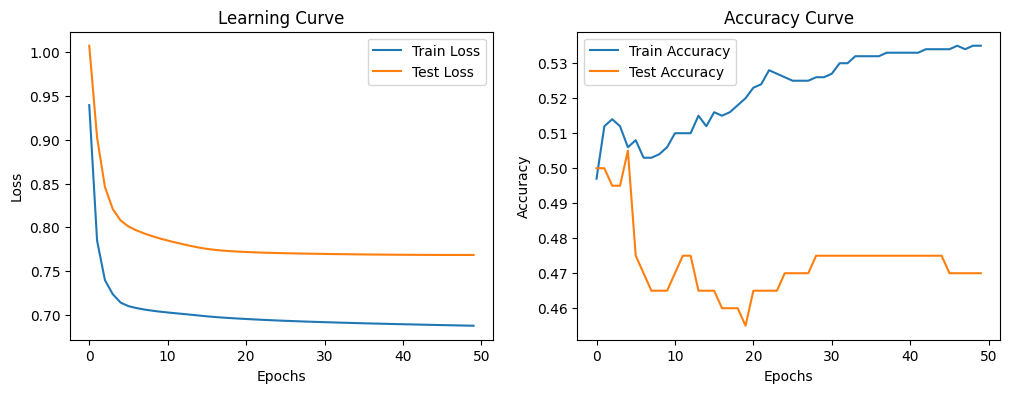

In [28]:
parameters = neural_network2(X_train_reshaped, y_train, X_test_reshaped, y_test, [X_train_reshaped.shape[0], 16, 16, 1], learning_rate=0.01, epoch=5000)

Even if the loss curve for the test set isn't increasing as we've seen before, there's still an overfitting problem.\
Even when I change the number of neurons in the hidden layer, and the number of layers, nothing changes.

Even worse, with too much neurons, the overfitting can be much worse because the model is really too complex.

You have to ask yourself the million dollar question:\
**“Is this a problem with the data, the model, or the training?”**

Let's say we have a good model. Here, there's a problem on the test set, meaning that we are not able to train the model properly. 

But the real problem here, is that the data is not enough to train a model with so many parameters. There are not enough images of cats and dogs to train a model with so many parameters. Let's stop here this journey.

## Conclusion
**You can be proud of yourself, for taking the lead of your own learning process.**

Now that I have lightened the candle, do you want to start the fire ?

Take your time to process the information — to reflect on the work and knowledge you’ve acquired, the code you’ve written, the code you’ve read.

Now, let me tell you something:

Everything we’ve been doing so far — it all boils down to one line of code.

Because the real work, the real mission, is understanding. And that’s why you're already ahead.

But there’s something else you need to hear:

Understanding how a neural network works is one thing. But understanding **when**, **how**, and **why** to use it — that’s another level.

That’s what makes data scientists valuable.\
That’s what makes them rare.\
That’s what makes them expensive.

That’s also why my next course will be about understanding what it means to **be a data scientist** — so that you can become one of them.

You won’t need to go through an engineering school, a master’s, or a bachelor’s degree. Of course, going through that gives you access to professors, courses, practical sessions, time between them to process what you’ve learned, exercises, tests, and exams.

And that, I can’t provide.

But remember — and I’ll remind you too — you made the decision to become the master of your own learning. To be the one who decides, the one who acts for his own knowledge. It’s a path of merit, but as I’ve told you before: I’m not here to please you. I’m not here to offer you comfort or let you settle into a superficial, porous kind of learning.

I’m here because I’m like you. I’m someone who chose to act. I went through the system — through engineering schools — but the things I truly learned are the ones I was disciplined and dedicated enough to pursue on my own.

I know it’s hard. But ask yourself: what’s harder? Learning like everyone else and doing the job everyone else does, or learning by your own decision — and doing work that stems from personal choice?

Wait — maybe you didn’t quite catch that. Do you prefer to **believe** in success, or to **follow** its trajectory?

Let me explain. Everything we’re doing here — this work on deep learning — it shouldn’t stop there. You shouldn’t let it define you. If you do, it’ll be the only thing you’re capable of, and you’ll end up working for others — your boss, your landlord. Yes, being excellent at deep learning is a powerful weapon. Yes, it’s hard to truly become good — I mean really good, like the kind of person who works through these notebooks with focus and care.

But don’t live for that. Go beyond the desire to be excellent, and you’ll become unique. Go beyond the idea that being a data scientist will solve everything. What will make the difference is exactly what you did at the start of this notebook: **you took your situation into your own hands**.

Because once you become a data scientist, you’ll still need to stop and think. I told you: being an excellent data scientist is a powerful weapon. And you don’t play around with that.

This, this is what I meant when I said you need to understand what’s happening. Understand the *what*, the *how*, and the *why*. That’s what will make you real. And fair.

So play the game.\
Make the effort.\
And see how far it can take you.

**Only you can decide that.**
